IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M4\FAULT_M4_10


VOLO M4 FAULT 10%

In [3]:
rcou_m4_fault10 = pd.read_csv("RCOU.csv")
rcou_m4_fault10 = rcou_m4_fault10.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m4_fault10 = rcou_m4_fault10[((rcou_m4_fault10['C9'] >= 1400) & (rcou_m4_fault10['C10'] >= 1400) & (rcou_m4_fault10['C11'] >= 1400) & (rcou_m4_fault10['C12'] >= 1400) & (rcou_m4_fault10['C13'] >= 1400) & (rcou_m4_fault10['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m4_fault10)

,TimeUS,C9,C10,C11,C12,C13,C14
604,71717439,1535,1415,1486,1471,1540,1410
607,71751266,1407,1583,1550,1448,1461,1539
608,71762205,1592,1413,1518,1500,1598,1405
610,71783641,1603,1426,1539,1502,1617,1407
611,71793864,1484,1563,1558,1489,1517,1533
...,...,...,...,...,...,...,...
6881,140815408,1599,1404,1593,1412,1559,1455
6882,140825207,1593,1406,1594,1404,1558,1450
6883,140836705,1581,1415,1590,1403,1543,1461
6884,140848285,1558,1426,1516,1474,1439,1547


In [4]:
xkf1_m4_fault10 = pd.read_csv("XKF1_0.csv")
xkf1_m4_fault10 = xkf1_m4_fault10.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m4_fault10 = xkf1_m4_fault10[((xkf1_m4_fault10['TimeUS'] >= 71717439) & (xkf1_m4_fault10['TimeUS'] <= 140859141))]
print(xkf1_m4_fault10)

         TimeUS  Roll  Pitch     Yaw
606    71725387 -0.14  -0.40  355.35
607    71735907 -0.21  -0.34  355.37
608    71749437 -0.25  -0.32  355.36
609    71759380 -0.09  -0.33  355.37
610    71770160  0.06  -0.32  355.36
...         ...   ...    ...     ...
6884  140813337  0.45   4.06    0.42
6885  140823342  0.49   3.88    0.36
6886  140834825  0.52   3.74    0.39
6887  140846172  0.56   3.73    0.45
6888  140856511  0.63   3.68    0.55

[6283 rows x 4 columns]


In [5]:
att_m4_fault10 = pd.read_csv("ATT.csv")
att_m4_fault10 = att_m4_fault10.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m4_fault10 = att_m4_fault10[((att_m4_fault10['TimeUS'] >= 71717439) & (att_m4_fault10['TimeUS'] <= 140859141))]
print(att_m4_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw
606    71726805     0.00 -0.14      0.14  -0.40  355.26  355.36
607    71737711    -0.02 -0.21      0.13  -0.34  355.26  355.38
608    71750670    -0.04 -0.25      0.10  -0.32  355.26  355.37
609    71761451    -0.05 -0.09      0.09  -0.33  355.26  355.38
610    71772203    -0.08  0.06      0.08  -0.32  355.26  355.37
...         ...      ...   ...       ...    ...     ...     ...
6884  140814739     1.13  0.45      3.87   4.06    1.35    0.42
6885  140824626     1.13  0.49      3.77   3.88    1.35    0.36
6886  140835923     1.12  0.52      3.70   3.74    1.35    0.39
6887  140847431     1.11  0.56      3.62   3.73    1.34    0.45
6888  140858295     1.09  0.63      3.54   3.68    1.34    0.55

[6283 rows x 7 columns]


In [6]:
att_m4_fault10 = pd.merge_asof(att_m4_fault10,xkf1_m4_fault10, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m4_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw
0      71726805     0.00 -0.14      0.14  -0.40  355.26  355.36
1      71737711    -0.02 -0.21      0.13  -0.34  355.26  355.38
2      71750670    -0.04 -0.25      0.10  -0.32  355.26  355.37
3      71761451    -0.05 -0.09      0.09  -0.33  355.26  355.38
4      71772203    -0.08  0.06      0.08  -0.32  355.26  355.37
...         ...      ...   ...       ...    ...     ...     ...
6278  140814739     1.13  0.45      3.87   4.06    1.35    0.42
6279  140824626     1.13  0.49      3.77   3.88    1.35    0.36
6280  140835923     1.12  0.52      3.70   3.74    1.35    0.39
6281  140847431     1.11  0.56      3.62   3.73    1.34    0.45
6282  140858295     1.09  0.63      3.54   3.68    1.34    0.55

[6283 rows x 7 columns]


In [7]:
esc_3_m4_fault10 = pd.read_csv("ESC_3.csv")
esc_3_m4_fault10 = esc_3_m4_fault10.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_3_m4_fault10 = esc_3_m4_fault10[((esc_3_m4_fault10['TimeUS'] >= 71717439) & (esc_3_m4_fault10['TimeUS'] <= 140859141))]
print(esc_3_m4_fault10)

        TimeUS   RPM  Curr
56    71775360  4141  3.47
57    71885643  5281  3.66
58    71999608  5936  3.12
59    72106916  5856  2.57
60    72217070  5587  2.45
61    72327882  5595  2.57
62    72435596  5406  2.17
63    72543859  5290  1.68
64    72649556  4986  2.27
65    72877072  5022  2.28
66    72987918  5234  2.35
67    73098639  5296  2.53
68    73209301  5271  2.70
69    73423005  5422  2.82
70    73529951  5586  2.40
71    73637237  5456  2.44
72    73747446  5378  2.36
73    73852842  5242  2.42
74    74178748  5300  2.59
75    74299058  5352  2.49
76    74405266  5299  2.22
77    74515357  5164  2.64
78    74613814  5275  2.91
79    74735378  5431  2.53
80    74834807  5285  2.32
81    74953388  5292  2.56
82    75058834  5356  2.36
83    75172657  5236  2.55
84    75281004  5478  2.47
85    75499803  5387  2.83
86    75714403  5441  3.25
87    75824865  5735  3.24
88    75925661  5811  3.26
89    76034650  5751  3.33
90    76147385  5972  3.44
91    76250576  5981  3.22
9

In [8]:
imu_2_m4_fault10 = pd.read_csv("IMU_2.csv")
imu_2_m4_fault10 = imu_2_m4_fault10.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m4_fault10 = imu_2_m4_fault10[((imu_2_m4_fault10['TimeUS'] >= 71717439) & (imu_2_m4_fault10['TimeUS'] <= 140859141))]
print(imu_2_m4_fault10)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
2397    71719749  0.440752 -0.075839 -0.017998 -0.206218  0.386916  -9.852871
2398    71721459  0.096822  0.144287 -0.005919 -0.344441  0.515489 -10.090360
2399    71724407 -0.208551  0.219902  0.020340 -0.394234  0.621105  -9.916035
2400    71726645 -0.221349  0.104350  0.030094 -0.449073  0.611627  -9.646758
2401    71729039  0.155273 -0.110379 -0.003735 -0.534705  0.456303  -9.620559
...          ...       ...       ...       ...       ...       ...        ...
26253  140847239  0.081388 -0.063524  0.073660  1.679024  0.879551 -13.098880
26254  140849891  0.170449 -0.012691  0.085531  2.004941  0.814563 -13.221110
26255  140853397  0.224963 -0.185696  0.108423  2.437454  0.593678 -13.457730
26256  140855323  0.182607 -0.174967  0.120315  2.694063  0.427216 -13.908530
26257  140858171  0.057142  0.006458  0.173961  3.179186  0.264093 -14.396360

[23861 rows x 7 columns]


In [9]:
m4_fault10 = pd.merge_asof(att_m4_fault10, imu_2_m4_fault10, on="TimeUS",  tolerance= 100000)
print(m4_fault10)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw     Yaw      GyrX  \
0      71726805     0.00 -0.14      0.14  -0.40  355.26  355.36 -0.221349   
1      71737711    -0.02 -0.21      0.13  -0.34  355.26  355.38 -0.140145   
2      71750670    -0.04 -0.25      0.10  -0.32  355.26  355.37 -0.301713   
3      71761451    -0.05 -0.09      0.09  -0.33  355.26  355.38  0.057496   
4      71772203    -0.08  0.06      0.08  -0.32  355.26  355.37  0.392336   
...         ...      ...   ...       ...    ...     ...     ...       ...   
6278  140814739     1.13  0.45      3.87   4.06    1.35    0.42  0.041777   
6279  140824626     1.13  0.49      3.77   3.88    1.35    0.36  0.075109   
6280  140835923     1.12  0.52      3.70   3.74    1.35    0.39  0.064597   
6281  140847431     1.11  0.56      3.62   3.73    1.34    0.45  0.081388   
6282  140858295     1.09  0.63      3.54   3.68    1.34    0.55  0.057142   

          GyrY      GyrZ      AccX      AccY       AccZ  
0     0.104350  0

In [10]:
m4_fault10 = pd.merge_asof(esc_3_m4_fault10, m4_fault10, on="TimeUS",  tolerance= 100000)
print(m4_fault10)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0     71775360  4141  3.47    -0.08   0.06      0.08  -0.32  355.26  355.37   
1     71885643  5281  3.66    -0.43   0.52     -0.04   0.21  355.27  355.59   
2     71999608  5936  3.12    -0.96   1.34     -0.24   0.47  355.27  356.42   
3     72106916  5856  2.57    -1.48   1.31     -0.35   0.22  355.27  357.67   
4     72217070  5587  2.45    -2.36   0.68     -0.50   0.19  355.27  359.25   
5     72327882  5595  2.57    -3.14  -0.10     -0.64   0.11  355.28    0.75   
6     72435596  5406  2.17    -4.01  -0.33     -0.94  -0.37  355.30    2.04   
7     72543859  5290  1.68    -4.55  -1.18     -0.98  -1.20  355.30    3.09   
8     72649556  4986  2.27    -4.89  -2.09     -0.82  -1.64  355.29    3.71   
9     72877072  5022  2.28    -5.54  -3.16     -0.28  -0.40  355.22    3.92   
10    72987918  5234  2.35    -5.70  -3.89     -0.08   0.35  355.20    3.65   
11    73098639  5296  2.53    -5.91  -3.76      0.00

In [11]:
m4_fault10["TimeUS"] = m4_fault10["TimeUS"] - m4_fault10.iloc[0]["TimeUS"]
m4_fault10["TimeUS"] = m4_fault10["TimeUS"].astype(int)
m4_fault10["Guasto"] = 2
print(m4_fault10)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw     Yaw  \
0           0  4141  3.47    -0.08   0.06      0.08  -0.32  355.26  355.37   
1      110283  5281  3.66    -0.43   0.52     -0.04   0.21  355.27  355.59   
2      224248  5936  3.12    -0.96   1.34     -0.24   0.47  355.27  356.42   
3      331556  5856  2.57    -1.48   1.31     -0.35   0.22  355.27  357.67   
4      441710  5587  2.45    -2.36   0.68     -0.50   0.19  355.27  359.25   
5      552522  5595  2.57    -3.14  -0.10     -0.64   0.11  355.28    0.75   
6      660236  5406  2.17    -4.01  -0.33     -0.94  -0.37  355.30    2.04   
7      768499  5290  1.68    -4.55  -1.18     -0.98  -1.20  355.30    3.09   
8      874196  4986  2.27    -4.89  -2.09     -0.82  -1.64  355.29    3.71   
9     1101712  5022  2.28    -5.54  -3.16     -0.28  -0.40  355.22    3.92   
10    1212558  5234  2.35    -5.70  -3.89     -0.08   0.35  355.20    3.65   
11    1323279  5296  2.53    -5.91  -3.76      0.00   0.45  355.

In [12]:
path_file = path_file.replace(r"M4\FAULT_M4_10", "")
os.chdir(path_file)
m4_fault10.to_csv('m4_fault10.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


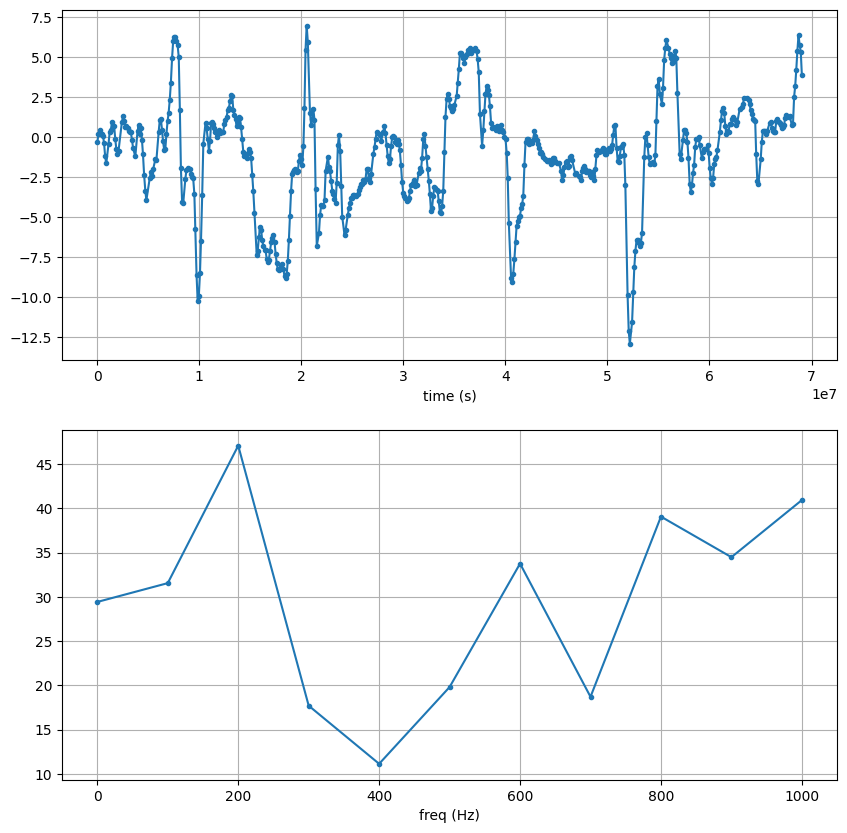

In [13]:
t = m4_fault10["TimeUS"]
y = m4_fault10["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

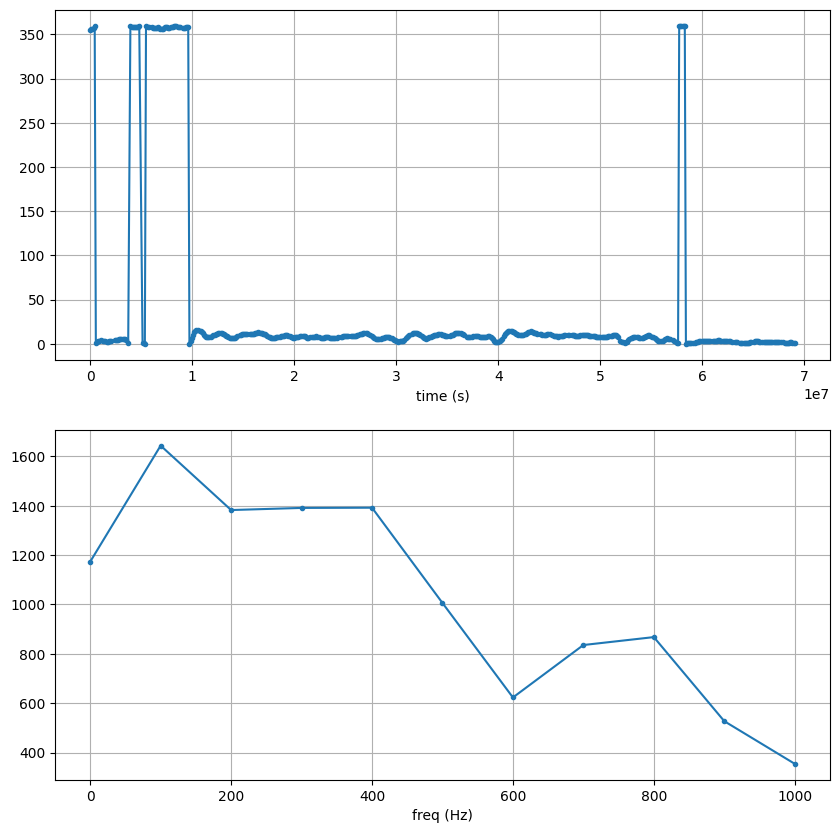

In [14]:
t = m4_fault10["TimeUS"]
y = m4_fault10["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

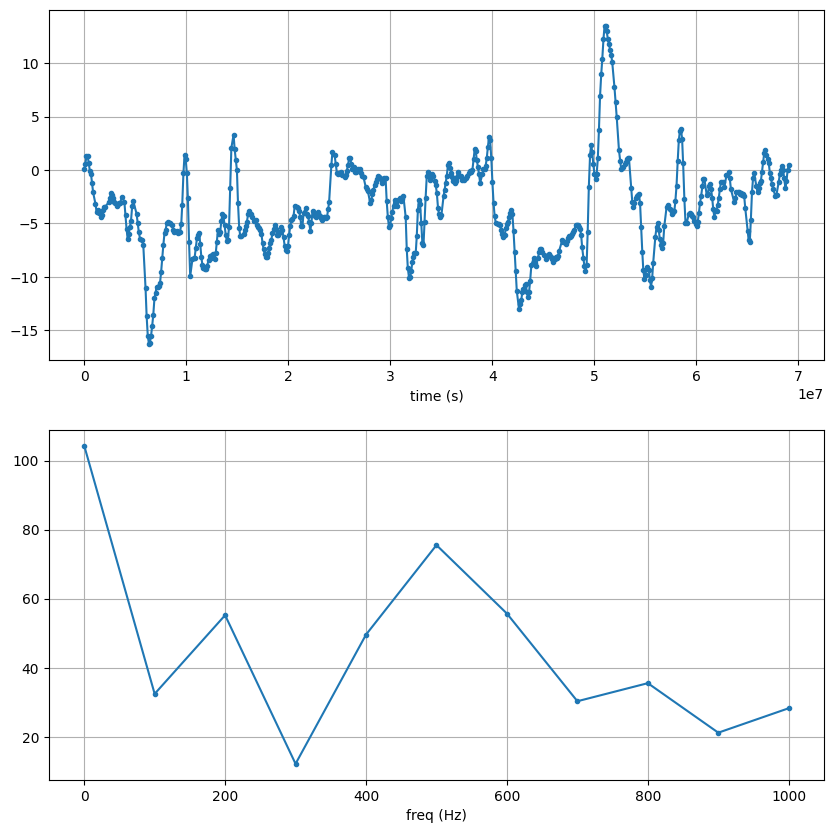

In [15]:
t = m4_fault10["TimeUS"]
y = m4_fault10["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

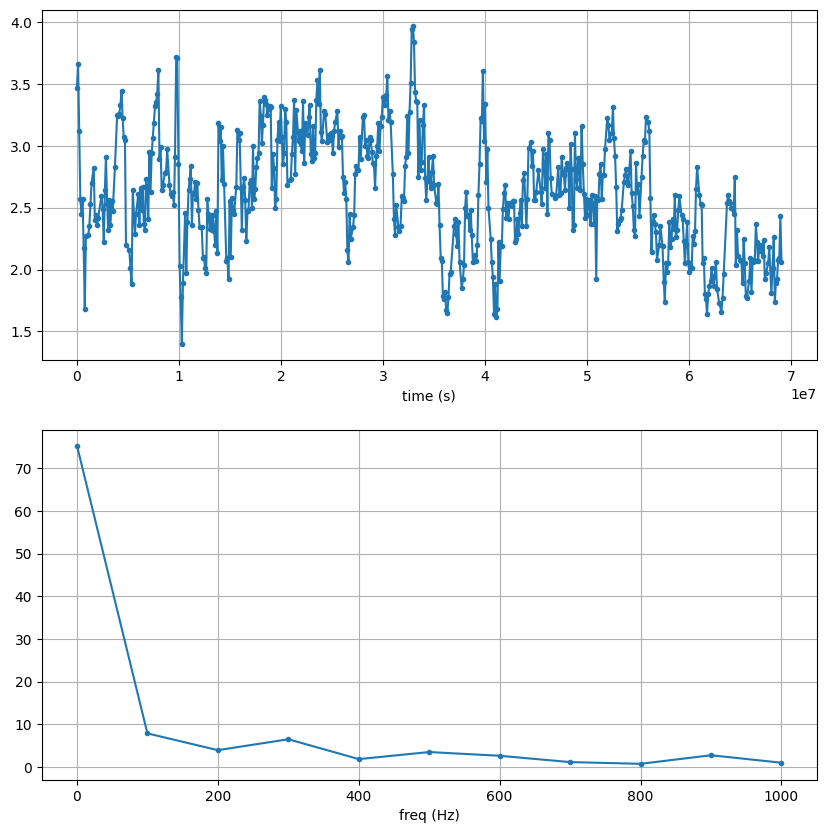

In [16]:
t = m4_fault10["TimeUS"]
y = m4_fault10["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

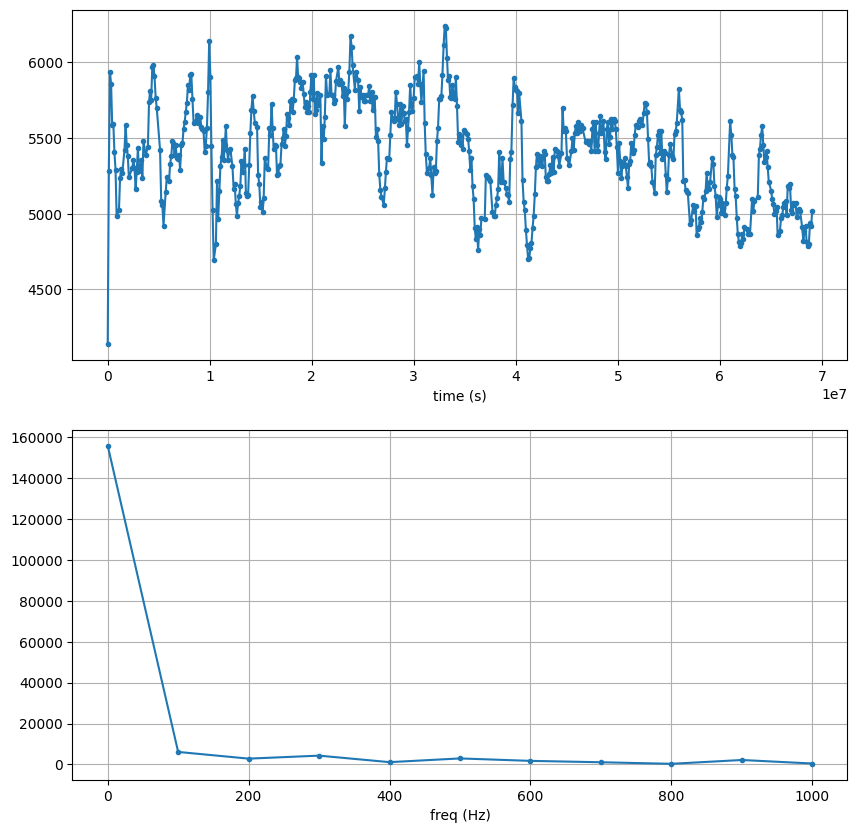

In [17]:
t = m4_fault10["TimeUS"]
y = m4_fault10["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

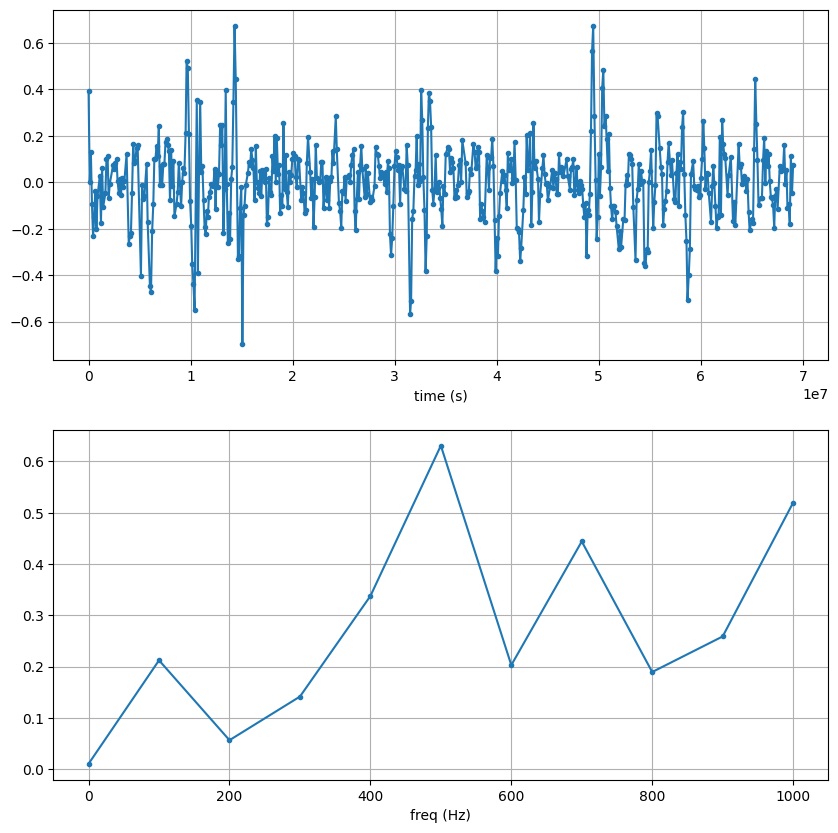

In [18]:
t = m4_fault10["TimeUS"]
y = m4_fault10["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

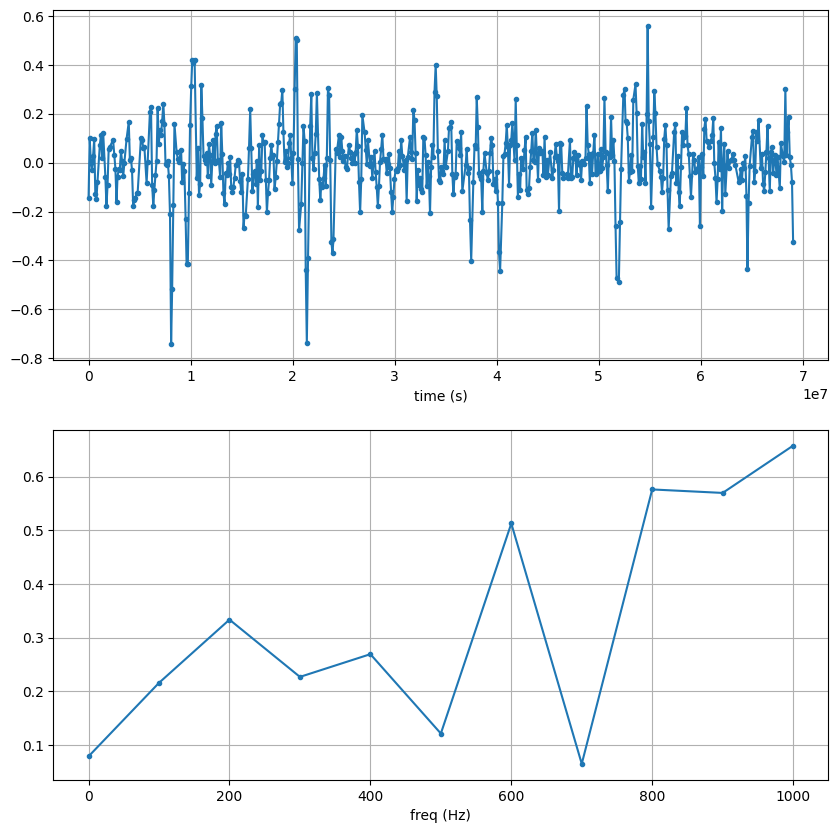

In [19]:
t = m4_fault10["TimeUS"]
y = m4_fault10["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

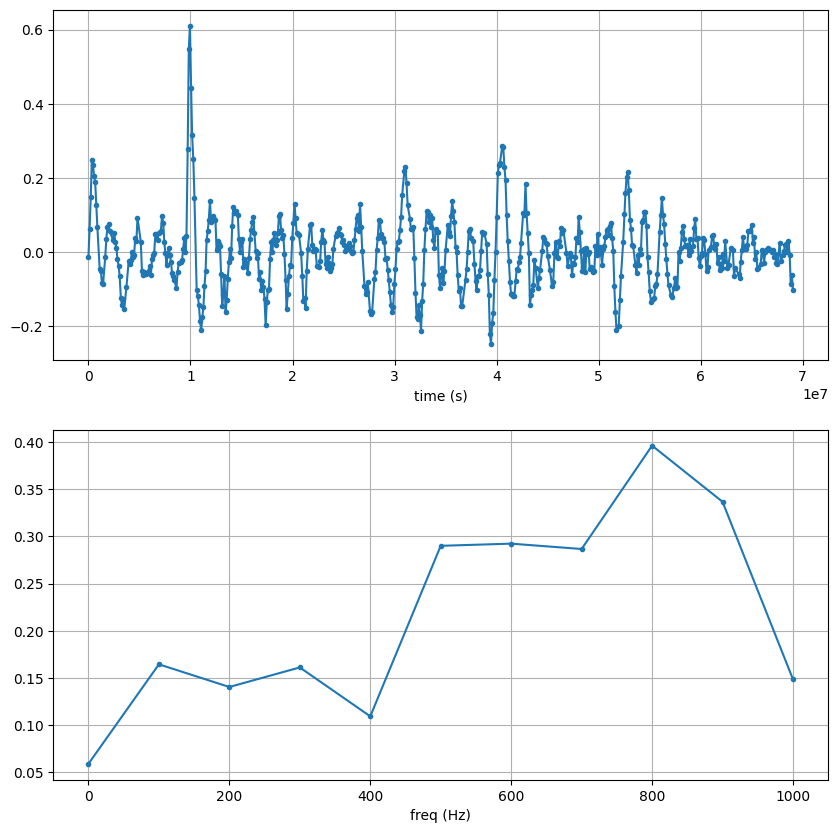

In [20]:
t = m4_fault10["TimeUS"]
y = m4_fault10["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

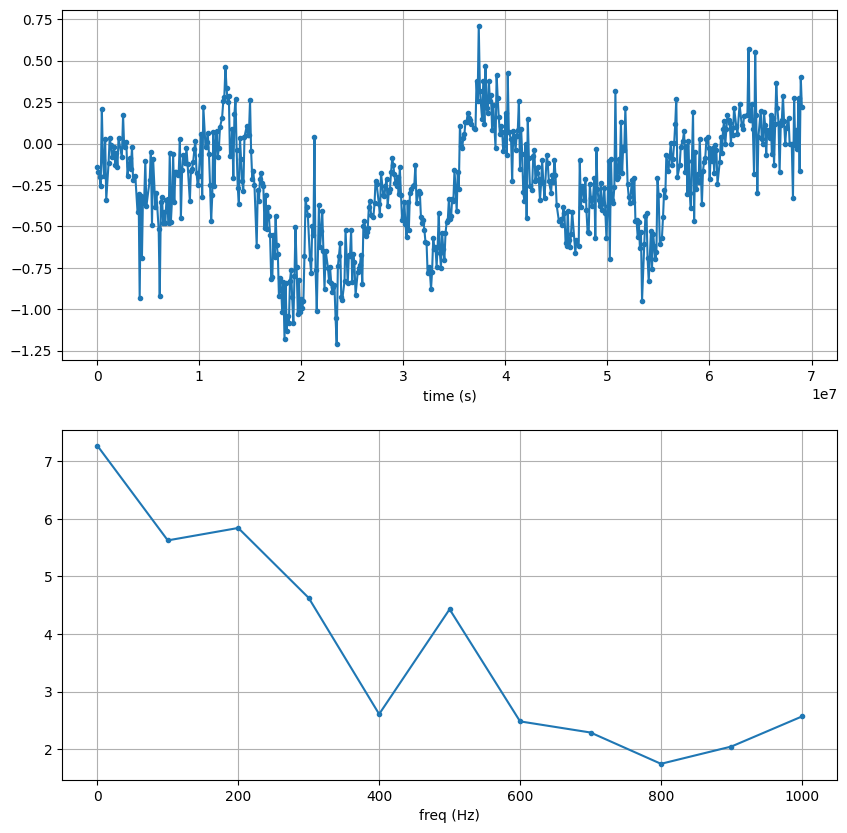

In [21]:
t = m4_fault10["TimeUS"]
y = m4_fault10["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

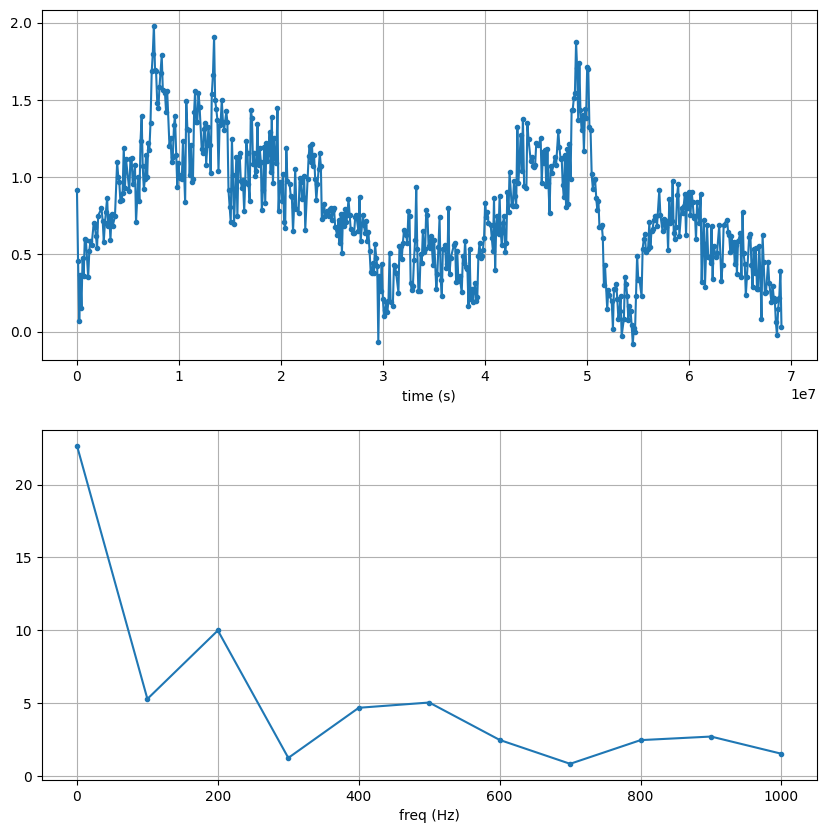

In [22]:
t = m4_fault10["TimeUS"]
y = m4_fault10["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

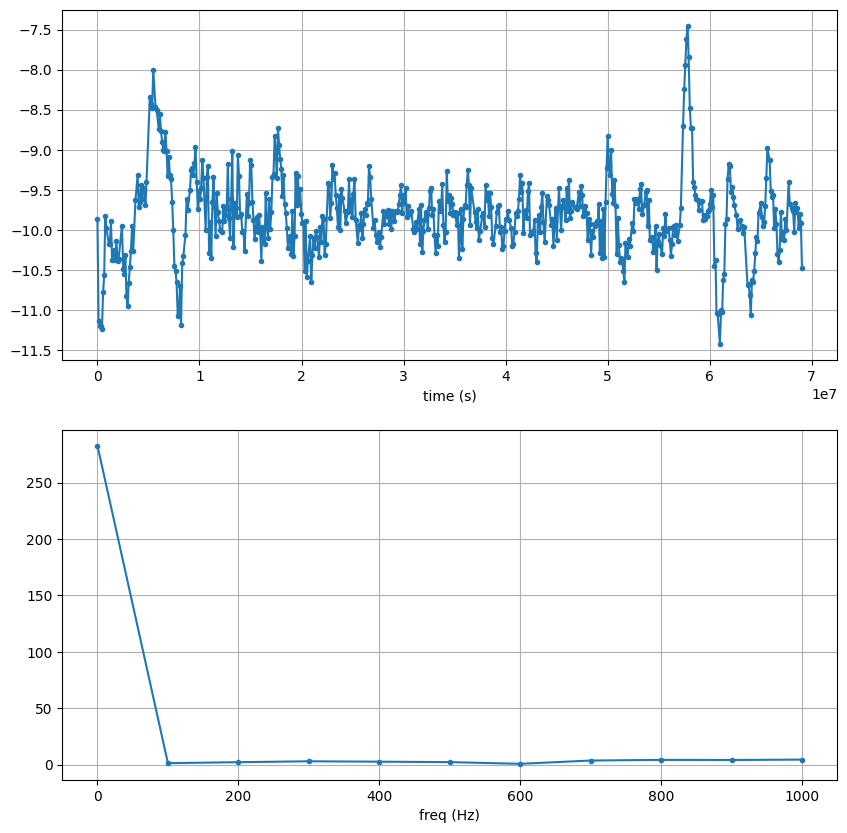

In [23]:
t = m4_fault10["TimeUS"]
y = m4_fault10["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()